
The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).




In [227]:
import pandas as pd
import numpy as np

In [228]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Preparing the dataset 

In [229]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [230]:
df=df[["ram","storage","screen","final_price"]]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA

* Look at the `final_price` variable. Does it have a long tail? 

<Axes: xlabel='final_price', ylabel='Count'>

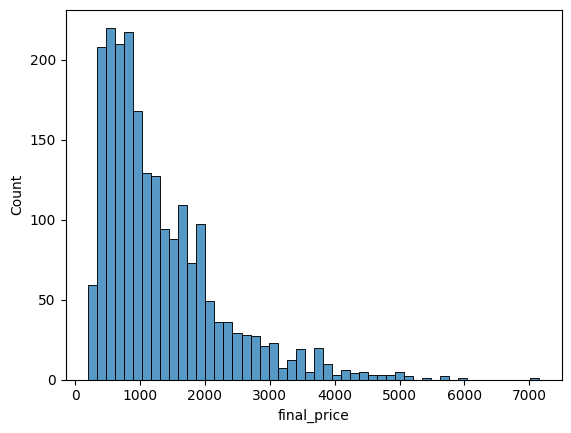

In [231]:
import seaborn as sns
sns.histplot(df.final_price,bins=50)

<Axes: xlabel='final_price', ylabel='Count'>

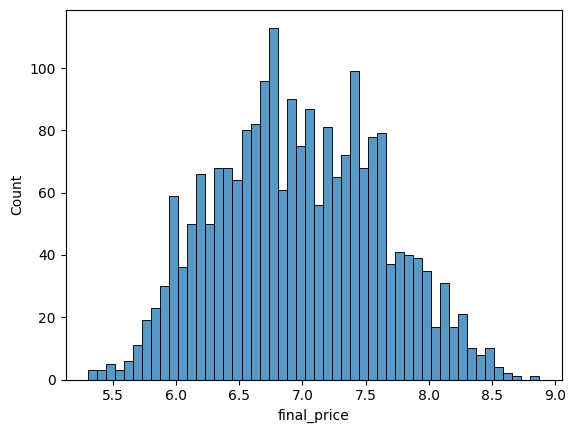

In [232]:
sns.histplot(np.log(df.final_price),bins=50)

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`


In [233]:
for col in df.columns:
    print("Total Number of missing values in the column "+col+"=",df[col].isnull().sum())

Total Number of missing values in the column ram= 0
Total Number of missing values in the column storage= 0
Total Number of missing values in the column screen= 4
Total Number of missing values in the column final_price= 0


In [234]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [235]:
df.isna().any()

ram            False
storage        False
screen          True
final_price    False
dtype: bool

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [236]:
df["ram"].median()

16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [237]:
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train=df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_train+n_val:]]
n_train,n_val,n_test,len(df_train),len(df_val),len(df_test)

(1296, 432, 432, 1296, 432, 432)

In [238]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [239]:
df_val.head()

,ram,storage,screen,final_price
132,32,1000,16.0,2599.00
80,16,512,15.6,999.00
1706,12,512,15.6,477.28
1769,8,256,13.6,1519.00
541,8,512,15.6,402.99


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


In [240]:
df_train["screen"].isnull().sum()

3

In [241]:
def rmse(y, y_pred):
    error=y-y_pred
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

# model 1 

In [242]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_model=df.copy()
df_model.loc[:,"screen"]=df_model["screen"].fillna(0)

n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train=df_model.iloc[idx[:n_train]]
df_val=df_model.iloc[idx[n_train:n_train+n_val]]
df_test=df_model.iloc[idx[n_train+n_val:]]
X_train=df_train[["ram","storage","screen"]].values
y_train=df_train["final_price"].tolist()
w0,w=train_linear_regression(X_train,y_train)
X_val=df_val[["ram","storage","screen"]].values
y_val=df_val["final_price"].tolist()
y_pred=w0+X_val.dot(w)
rmse(y_val, y_pred),round(rmse(y_val, y_pred), 2)

(597.363559361963, 597.36)

# model 2

In [243]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_model=df.copy()

n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train=df_model.iloc[idx[:n_train]]
df_model.loc[:,"screen"]=df_model["screen"].fillna(df_train["screen"].mean())
df_train=df_model.iloc[idx[:n_train]]

df_val=df_model.iloc[idx[n_train:n_train+n_val]]
df_test=df_model.iloc[idx[n_train+n_val:]]
X_train=df_train[["ram","storage","screen"]].values
y_train=df_train["final_price"].tolist()
w0,w=train_linear_regression(X_train,y_train)
X_val=df_val[["ram","storage","screen"]].values
y_val=df_val["final_price"].tolist()
y_pred=w0+X_val.dot(w)
rmse(y_val, y_pred),round(rmse(y_val, y_pred), 2)

(600.2650313748483, 600.27)

### Answer Question 3: Model 1 is better


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [244]:
def train_linear_regression_reg(X,y,r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_model=df.copy()
df_model.loc[:,"screen"]=df_model["screen"].fillna(0)
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
RMSE={}
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    np.random.seed(42)
    np.random.shuffle(idx)
   
    
    df_train=df_model.iloc[idx[:n_train]]
    df_val=df_model.iloc[idx[n_train:n_train+n_val]]
    df_test=df_model.iloc[idx[n_train+n_val:]]
    X_train=df_train[["ram","storage","screen"]].values
    y_train=df_train["final_price"].tolist()
    w0,w=train_linear_regression_reg(X_train,y_train,r)
    X_val=df_val[["ram","storage","screen"]].values
    y_val=df_val["final_price"].tolist()
    y_pred=w0+X_val.dot(w)
    RMSE[r]=rmse(y_val, y_pred)
  
RMSE

{0: 597.363559361963,
 0.01: 564.1455833606033,
 0.1: 656.3227833325611,
 1: 654.3181021504977,
 5: 587.4628252044997,
 10: 548.6885891419754,
 100: 625.2611878256886}

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [245]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_model=df.copy()
df_model.loc[:,"screen"]=df_model["screen"].fillna(0)
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
RMSE=[]
for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(x)
    np.random.shuffle(idx)
   
    
    df_train=df_model.iloc[idx[:n_train]]
    df_val=df_model.iloc[idx[n_train:n_train+n_val]]
    df_test=df_model.iloc[idx[n_train+n_val:]]
    X_train=df_train[["ram","storage","screen"]].values
    y_train=df_train["final_price"].tolist()
    w0,w=train_linear_regression(X_train,y_train)
    X_val=df_val[["ram","storage","screen"]].values
    y_val=df_val["final_price"].tolist()
    y_pred=w0+X_val.dot(w)
    RMSE.append(rmse(y_val, y_pred))
  
round(np.std(RMSE), 3)

33.49

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [246]:
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_model=df.copy()
df_model["log_price"]=np.log(df_model["final_price"])
df_model.loc[:,"screen"]=df["screen"].fillna(0)
df_trainval=df_model.iloc[idx[:n_train+n_val]]
df_test=df_model.iloc[idx[n_train+n_val:]]
X_train=df_trainval[["ram","storage","screen"]].values
y_train=df_trainval["final_price"].tolist()
w0,w=train_linear_regression_reg(X_train,y_train,0.001)
X_val=df_test[["ram","storage","screen"]].values
y_val=df_test["final_price"].tolist()
y_pred=w0+X_val.dot(w)
rmse(y_val, y_pred)

608.6099822049601